In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from keras.preprocessing import image
from sklearn.cluster import KMeans
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten,Dense,Softmax,Activation, Dropout,BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils  import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ReduceLROnPlateau

In [2]:
image_path='Thyroid_images'
images=[os.path.join(image_path,f) for f in os.listdir(image_path)]

In [3]:
images

['Thyroid_images\\100_1.jpg',
 'Thyroid_images\\101_1.jpg',
 'Thyroid_images\\102_1.jpg',
 'Thyroid_images\\103_1.jpg',
 'Thyroid_images\\104_1.jpg',
 'Thyroid_images\\105_1.jpg',
 'Thyroid_images\\106_1.jpg',
 'Thyroid_images\\106_2.jpg',
 'Thyroid_images\\106_3.jpg',
 'Thyroid_images\\106_4.jpg',
 'Thyroid_images\\107_1.jpg',
 'Thyroid_images\\108_1.jpg',
 'Thyroid_images\\109_1.jpg',
 'Thyroid_images\\10_1.jpg',
 'Thyroid_images\\110_1.jpg',
 'Thyroid_images\\111_1.jpg',
 'Thyroid_images\\112_1.jpg',
 'Thyroid_images\\113_1.jpg',
 'Thyroid_images\\114_2.jpg',
 'Thyroid_images\\115_1.jpg',
 'Thyroid_images\\116_1.jpg',
 'Thyroid_images\\117_1.jpg',
 'Thyroid_images\\118_1.jpg',
 'Thyroid_images\\119_1.jpg',
 'Thyroid_images\\11_1.jpg',
 'Thyroid_images\\120_1.jpg',
 'Thyroid_images\\121_1.jpg',
 'Thyroid_images\\122_1.jpg',
 'Thyroid_images\\122_2.jpg',
 'Thyroid_images\\123_1.jpg',
 'Thyroid_images\\124_1.jpg',
 'Thyroid_images\\125_1.jpg',
 'Thyroid_images\\126_1.jpg',
 'Thyroid_im

In [4]:
img=cv2.imread(images[0])
img.shape

(360, 560, 3)

In [5]:
input_image=[]
labels=[]
for imgs in images:
    #print(imgs)
    img=image.load_img(imgs,target_size=(224,224,3))
    img=image.img_to_array(img)
    print(img.shape)
    img=img/255
    input_image.append(img)
    l=re.split('[_.]',imgs)
    labels.append(int(l[-2]))

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [6]:
Input_image=np.array(input_image)
Input_image.shape

(480, 224, 224, 3)

In [7]:
labels[:10]

[1, 1, 1, 1, 1, 1, 1, 2, 3, 4]

In [8]:
n_classes=np.unique(labels)

In [9]:
n_classes

array([1, 2, 3, 4, 5])

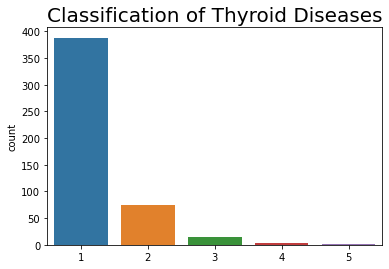

In [10]:
plt.title("Classification of Thyroid Diseases", fontsize=20)
sns.countplot(labels)

In [11]:
Y=LabelBinarizer().fit_transform(labels)

In [12]:
Y.shape

(480, 5)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(Input_image,Y,test_size=0.2,random_state=42)

In [14]:
X_test.shape

(96, 224, 224, 3)

In [15]:
X_train.shape

(384, 224, 224, 3)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

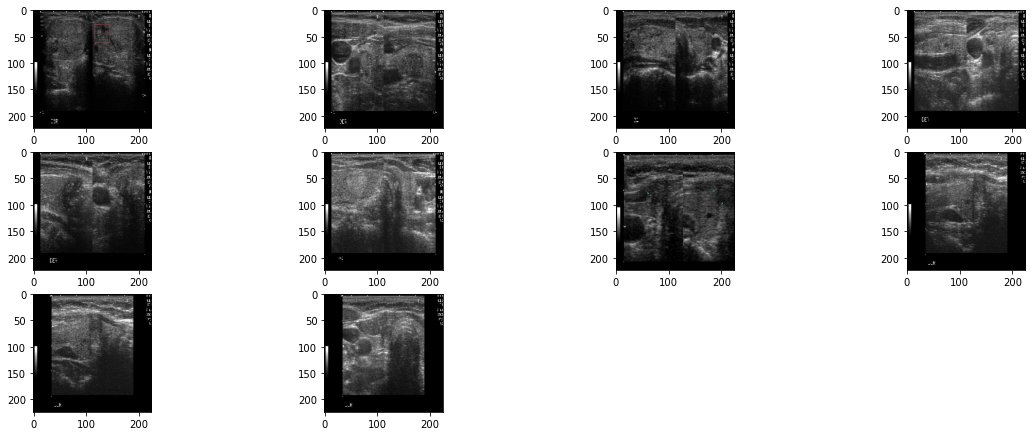

In [17]:
i=0
plt.figure(figsize=(20,10))
for imgs in Input_image[:10]:
    plt.subplot(4,4,i+1)
    plt.imshow(imgs)
    i+=1
plt.show()

In [18]:
def image_flatten(image):
    Image_flatten=[]
    for img in image:
        img_flatten=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
        Image_flatten.append(img_flatten)
    return np.array(Image_flatten)

In [19]:
X_flatten=image_flatten(Input_image[:100])

In [20]:
X_flatten[0].shape

(50176, 3)

In [21]:
segmented_image=[]
for im in X_flatten:
        km=KMeans(n_clusters=10).fit(im)
        seg=km.cluster_centers_[km.labels_]
        img_seg=seg.reshape(224,224,3)
        segmented_image.append(img_seg)

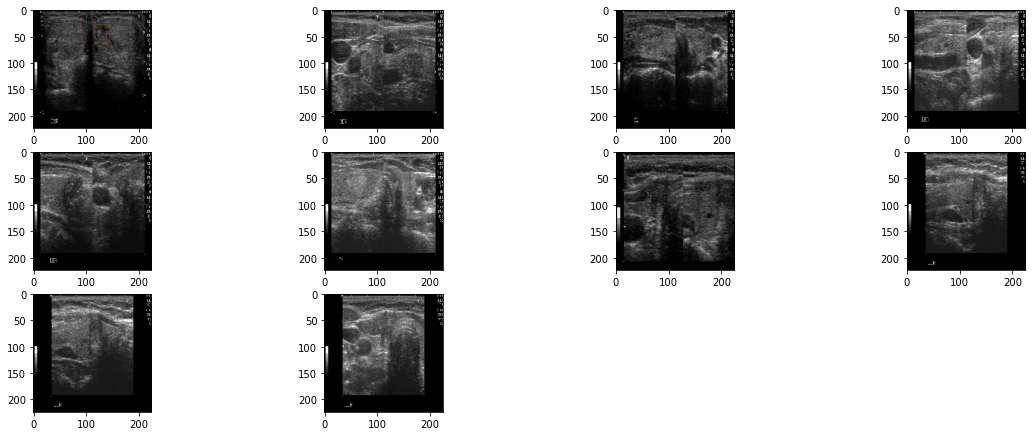

In [22]:
i=0
plt.figure(figsize=(20,10))
for seg in segmented_image[:10]:
    plt.subplot(4,4,i+1)
    plt.imshow(seg)
    i+=1
plt.show()

In [23]:
input_shape=(224,224,3)
num_classes=5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [24]:
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\Akash yadav\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [26]:
history=model.fit(X_train,Y_train, batch_size=15,epochs=25,callbacks=[learning_rate_reduction],validation_data=(X_test,Y_test))

Epoch 1/25
26/26 [==============================] - 68s 2s/step - loss: 0.7311 - accuracy: 0.7760 - val_loss: 0.6881 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/25
26/26 [==============================] - 60s 2s/step - loss: 0.6035 - accuracy: 0.8229 - val_loss: 0.7057 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/25
26/26 [==============================] - 61s 2s/step - loss: 0.5978 - accuracy: 0.8151 - val_loss: 0.7029 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/25
26/26 [==============================] - ETA: 0s - loss: 0.5645 - accuracy: 0.8229
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
26/26 [==============================] - 61s 2s/step - loss: 0.5645 - accuracy: 0.8229 - val_loss: 0.6619 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/25
26/26 [==============================] - 60s 2s/step - loss: 0.5174 - accuracy: 0.8333 - val_loss: 0.6868 - val_accuracy: 0.7500 - lr: 5.0000e-04
Epoch 6/25
26/26 [==============================] - 61s 2s/step - loss: 

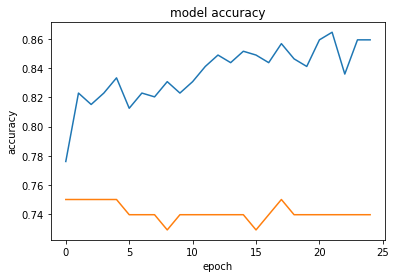

In [27]:
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
#Summarizing history for accracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

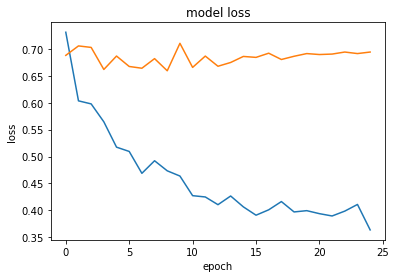

In [28]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
#Summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [29]:
y_pred=model.predict(X_test)
print(np.argmax(y_pred,axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
prob=y_pred=model.predict(X_test[1].reshape(1,224,224,3))
print(prob)
print(np.argmax(prob,axis=1))
label=np.argmax(prob,axis=1)

[[9.4889891e-01 2.7308201e-02 2.3097375e-02 3.8031791e-04 3.1525851e-04]]
[0]


(224, 224, 3)
(6, 6)


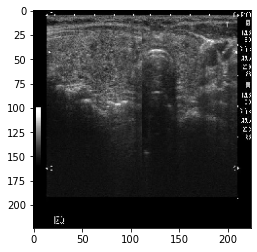

100
(224, 224, 3)
(6, 6)


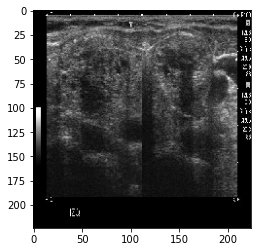

100
(224, 224, 3)
(6, 6)


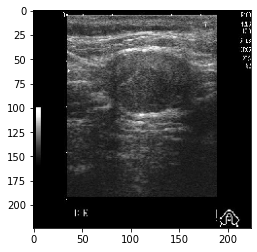

100
(224, 224, 3)
(6, 6)


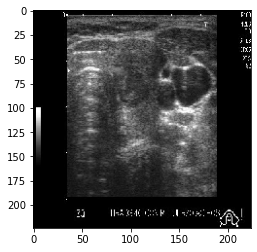

100
(224, 224, 3)
(6, 6)


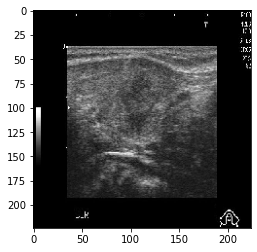

100
(224, 224, 3)
(6, 6)


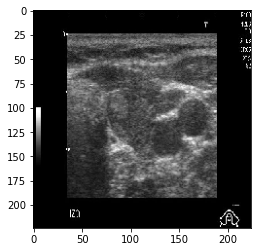

100
(224, 224, 3)
(6, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


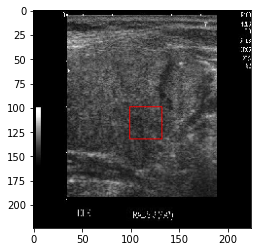

100
(224, 224, 3)
(6, 6)


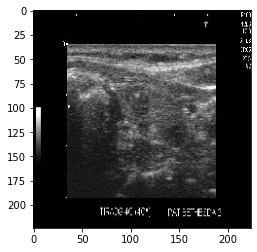

100
(224, 224, 3)
(6, 6)


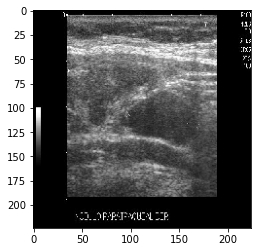

100
(224, 224, 3)
(6, 6)


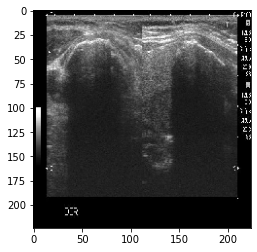

100
(224, 224, 3)
(6, 6)


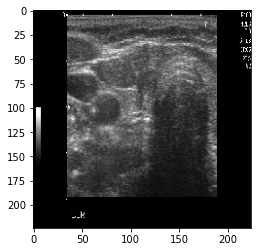

100
(224, 224, 3)
(6, 6)


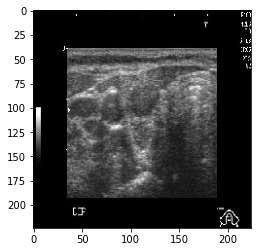

100
(224, 224, 3)
(6, 6)


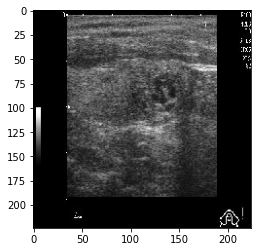

100
(224, 224, 3)
(6, 6)


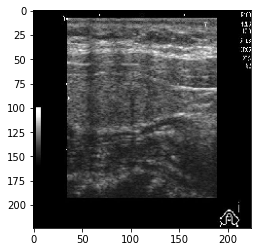

100
(224, 224, 3)
(6, 6)


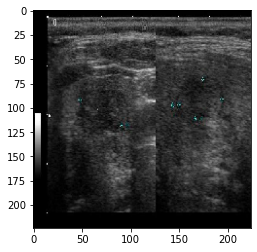

100
(224, 224, 3)
(6, 6)


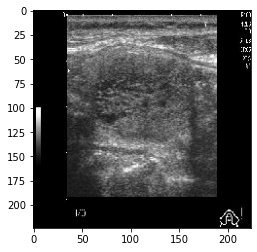

100
(224, 224, 3)
(6, 6)


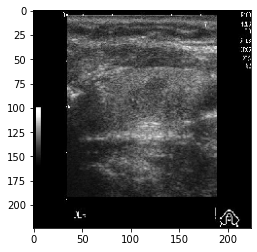

100
(224, 224, 3)
(6, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


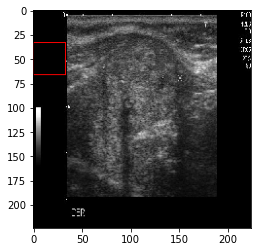

100
(224, 224, 3)
(6, 6)


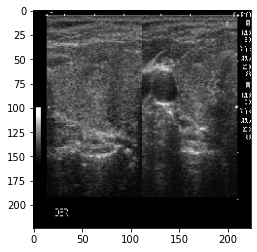

100
(224, 224, 3)
(6, 6)


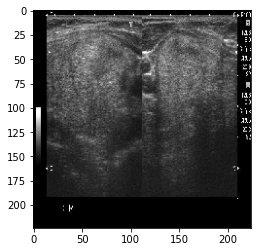

100
(224, 224, 3)
(6, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


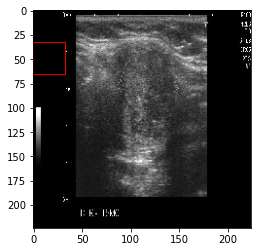

100
(224, 224, 3)
(6, 6)


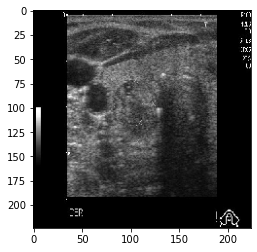

100
(224, 224, 3)
(6, 6)


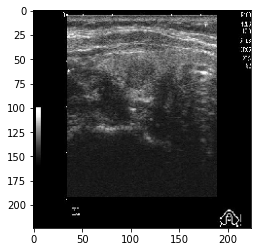

100
(224, 224, 3)
(6, 6)


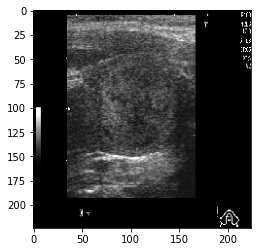

100
(224, 224, 3)
(6, 6)


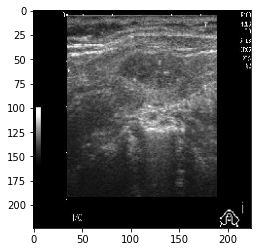

100
(224, 224, 3)
(6, 6)


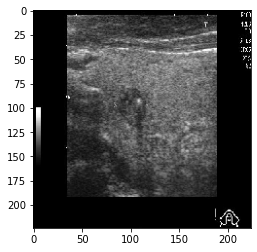

100
(224, 224, 3)
(6, 6)


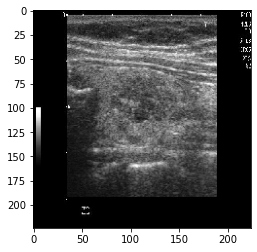

100


In [34]:
def occlusion(image,label,occ_size=33,occ_stride=33,occ_pix=1.5):
    print(image.shape)
    Image=image.copy()
    image_width=image.shape[0]
    image_height=image.shape[1]
    output_width=int(np.ceil((image_width-occ_size)/occ_stride))
    output_height=int(np.ceil((image_height-occ_size)/occ_stride))
    heatmap=np.zeros((output_width,output_height))
    print(heatmap.shape)
    stop=0
    for h in range(image_height):
        for w in range(image_width):
            h_start=h*occ_stride
            w_start=w*occ_stride
            h_end=min(image_height,h_start+occ_stride)
            w_end=min(image_width,w_start+occ_stride)
            if(w_end>=image_width or h_end>=image_height):
                continue
            img=image.copy()
            img[w_start:w_end,h_start:h_end,:]=occ_pix
            out=model.predict(img.reshape(1,224,224,3))
            prob=out
            if(np.max(prob,axis=1)<0.50): #change the probality according to the image
                rect=cv2.rectangle(Image, (w_start,h_start), (w_end,h_end), (255,0,0), 1)
                stop=1
                break
        if(stop==1):
             break
    plt.imshow(Image)
    plt.show()
    return heatmap
    
for i in range(27):
    htmap=occlusion(X_test[i],label)  
    print(100)

In [33]:
model.save('Thyroid_new.h5')